<a href="https://colab.research.google.com/github/kunakl07/orcagsoc/blob/kunakl07-patch-1/Resnet152_pre_pcen_wd_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip '/content/pcen_and_wavelet_test.zip'

Archive:  /content/pcen_and_wavelet_test.zip
   creating: content/Round2_OS_07_05/test/
   creating: content/Round2_OS_07_05/test/nocalls/
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg21_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg46_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg33_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg42_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg88_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg26_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg12_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg54_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg82_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg7_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg6_0000.png  
  inf

In [0]:
!unzip '/content/pcen_and_wavelet_trainsave.zip'

Archive:  /content/pcen_and_wavelet_trainsave.zip
   creating: content/Round2_OS_07_05/train/
   creating: content/Round2_OS_07_05/train/nocalls/
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod333219_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod333201_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod333373_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod260_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod252_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod2305_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod225_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod333427_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod2250_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod2135_0000.png  
  inflating: content/Round2_OS_07_05/train/nocall

In [0]:
import matplotlib
matplotlib.use("Agg")

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.applications import ResNet152V2
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os


Using TensorFlow backend.


In [0]:
train_path='/content/content/Round2_OS_07_05/train'
test_path='/content/content/Round2_OS_07_05/test'

In [0]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['calls','nocalls'])
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['calls','nocalls'])


Found 1570 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [0]:
import keras

In [0]:
resnet152_model=keras.applications.resnet.ResNet152()
resnet152_model.summary()

242900992/242900224 [==============================] - 8s 0us/step
Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys, numpy
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, Input
from keras import callbacks, regularizers
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.engine import  Model
from keras.layers import Conv2D, GlobalAveragePooling2D
from sklearn import metrics

In [0]:


# re-sizing all the images to this
IMAGE_SIZE = [224, 224]


# add preprocessing layer to the front of resnet152
resnet152_model = ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# not training existing weights
for layer in resnet152_model.layers:
  layer.trainable = False
  


234553344/234545216 [==============================] - 8s 0us/step


In [0]:
import glob

In [0]:
#folders = glob('/content/content/Round2_OS_07_05/train/*')
#folders

In [0]:
 
  
# useful for getting number of classes
  

# our layers
x = Flatten()(resnet152_model.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

# creating a model object
model = Model(inputs=resnet152_model.input, outputs=prediction)

# structure of the model
model.summary()


model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/content/Round2_OS_07_05/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/content/Round2_OS_07_05/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
'''

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n'

In [0]:
import socket

In [0]:
# fit the model
r = model.fit_generator(
  training_set,
  epochs=50,
  steps_per_epoch=len(training_set),
)

Epoch 1/50
50/50 [==============================] - 550s 11s/step - loss: 2.2999 - accuracy: 0.6822
Epoch 2/50
50/50 [==============================] - 543s 11s/step - loss: 2.6771 - accuracy: 0.7261
Epoch 3/50
50/50 [==============================] - 542s 11s/step - loss: 2.9218 - accuracy: 0.7248
Epoch 4/50
50/50 [==============================] - 542s 11s/step - loss: 2.8033 - accuracy: 0.7643
Epoch 5/50
50/50 [==============================] - 542s 11s/step - loss: 3.5460 - accuracy: 0.7268
Epoch 6/50
50/50 [==============================] - 541s 11s/step - loss: 3.2282 - accuracy: 0.7478
Epoch 7/50
50/50 [==============================] - 541s 11s/step - loss: 2.9044 - accuracy: 0.7745
Epoch 8/50
50/50 [==============================] - 543s 11s/step - loss: 3.4359 - accuracy: 0.7599
Epoch 9/50
50/50 [==============================] - 543s 11s/step - loss: 2.9857 - accuracy: 0.7828
Epoch 10/50
50/50 [==============================] - 542s 11s/step - loss: 4.1601 - accuracy: 0.7529

KeyboardInterrupt: ignored

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


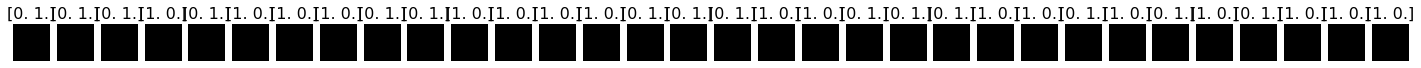

In [0]:

# plot function, used to plot images with labels within jupyter notebook
def plots(ims, figsize=(25,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims= np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

test_imgs, test_labels = next(test_set3)

# we plot these samples of images and their labels 1 batch at a time.
plots(test_imgs, titles=test_labels)

In [0]:
model.save('resnet152.h5')

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
import matplotlib.pyplot as plt


In [0]:
%matplotlib inline


In [0]:
def plot_confusion_matrix(cm,classes,normalize=False,title='confusion_matrix',cmap=plt.cm.Blues
):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes)
  plt.yticks(tick_marks,classes)

  print(cm)
  thresh=cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j], horizontalalignment="center",color='white' if cm[i,j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [0]:
predictions2=model.predict_generator(test_set,steps=6.28125,verbose=0)

In [0]:
predictions2.shape

(201, 2)

In [0]:
test_set.image_shape

(224, 224, 3)

In [0]:

test_set3 = test_datagen.flow_from_directory('/content/content/Round2_OS_07_05/test',
                                            target_size = (224, 224),
                                            batch_size = 201,
                                            class_mode = 'categorical')

Found 201 images belonging to 2 classes.


In [0]:
test_batches4=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['calls','nocalls'],batch_size=201)


Found 201 images belonging to 2 classes.


In [0]:

test_imgs4, test_labels4 = next(test_batches4)

# we plot these samples of images and their labels 1 batch at a time.
plots(test_imgs4, titles=test_labels4)

In [0]:
test_labels4=test_labels4[:,0]
test_labels4


array([0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.],
      dtype=float32)

In [0]:
np.round(predictions2[:,0])

array([1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.],
      dtype=float32)

In [0]:
cm=confusion_matrix(test_labels4,np.round(predictions2[:,0]))

In [0]:
cm_plot_labels=['calls','nocalls']

In [0]:
import itertools

[[52 48]
 [50 51]]


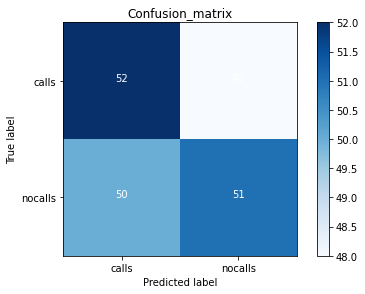

In [0]:
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion_matrix')

In [0]:

test_imgs2, test_labels2 = next(test_batches2)

# we plot these samples of images and their labels 1 batch at a time.
plots(test_imgs2, titles=test_labels2)

In [0]:
test_labels2=test_labels2[:,0]


In [0]:
test_labels2.size

201

In [0]:
cm=confusion_matrix(test_labels2,np.round(predictions[:,0]))

In [0]:
cm_plot_labels=['calls','nocalls']

In [0]:
import itertools

[[43 57]
 [55 46]]


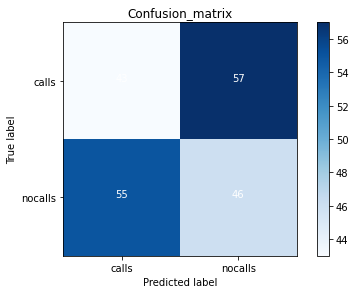

In [0]:
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion_matrix')

In [0]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('RESNET152_new_model.h5')

NameError: ignored

In [0]:

import tensorflow as tf

from keras.models import load_model

model.save('RESNET152_new_model.h5')

In [0]:
for layer in model.layers:
    layer.trainable=False

In [0]:
model.add(Dense(2, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
import tensorflow as tf

In [0]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=False
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [0]:
model.compile(loss="categorical_crossentropy", optimizer=optimizer,
	metrics=["accuracy"])

In [0]:
%cd /content/

/content


#Basic CNN


In [0]:


train_data_path = '/content/content/Round2_OS_07_05/train/'
test_data_path = '/content/content/Round2_OS_07_05/test/'

#Parametres
img_width, img_height = 607, 617

nb_train_samples = sum(len(files) for _, _, files in os.walk(train_data_path))
print(nb_train_samples)
epochs = 100
batch_size = 157



1570


In [0]:
import cv2

In [0]:
img=cv2.imread('/content/content/Round2_OS_07_05/train/calls/calls101_0000.png')

In [0]:
img.shape

(607, 617, 3)

In [0]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

# K.set_image_dim_ordering('th')

model = Sequential()
model.add(Conv2D(64, (5, 5), padding = 'same', strides=3, input_shape=input_shape))
# model.add(Conv2D(32, (5, 5), padding = 'same', strides=2))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (5, 5), strides=3, padding = 'same'))
# model.add(Conv2D(32, (5, 5), strides=2, padding = 'same'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))

model.add(Conv2D(128, (5, 5),  strides=3, padding = 'same'))
# model.add(Conv2D(64, (5, 5),  strides=2, padding = 'same'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))

model.add(Conv2D(128, (5, 5), strides=3, padding = 'same'))
# model.add(Conv2D(64, (5, 5), strides=2, padding = 'same'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-5),
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 203, 206, 64)      4864      
_________________________________________________________________
activation_1 (Activation)    (None, 203, 206, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 203, 206, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 68, 69, 64)        102464    
_________________________________________________________________
activation_2 (Activation)    (None, 68, 69, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 68, 69, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)      

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys, numpy
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, Input
from keras import callbacks, regularizers
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.engine import  Model
from keras.layers import Conv2D, GlobalAveragePooling2D
from sklearn import metrics

In [0]:

train_datagen = ImageDataGenerator(rescale=1. / 255)


test_datagen = ImageDataGenerator(rescale=1. / 255)

# Change the batchsize according to your system RAM
train_batchsize = 157

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_width, img_height),
    batch_size=train_batchsize,
    class_mode='binary',
shuffle=True)


# validation_generator.reset()

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    
    )

# model.save_weights('orca_detection_3.h5')
model.save('srkw.h5')

Found 1570 images belonging to 2 classes.
Epoch 1/50
 1/10 [==>...........................] - ETA: 5:26 - loss: 0.6981 - accuracy: 0.4968